# Exploratory Data Analysis

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np
from scipy.stats import iqr

## overall summaries

In [2]:
data = pd.read_csv(".\\data\\latest_printings.csv")
data.head(5)

,id,names,supertypes,MAX(set_year),rarity,cmc,color,modern_legality,standard_legality,commander_legality,vintage_legality,legacy_legality,reprint,price,is_legendary,edhrec
0,0,Aerial Assault,Sorcery,2019,Common,3,White,Legal,Legal,Legal,Legal,Legal,True,0.06,False,184
1,1,Ajani Strength of the Pride,Planeswalker,2019,Mythic Rare,4,White,Legal,Legal,Legal,Legal,Legal,True,12.42,True,2164
2,2,Ancestral Blade,Artifact,2019,Uncommon,2,White,Legal,Legal,Legal,Legal,Legal,True,0.11,False,392
3,3,Angel of Vitality,Creature,2019,Uncommon,3,White,Legal,Legal,Legal,Legal,Legal,True,0.26,False,1720
4,4,Angelic Gift,Enchantment,2019,Common,2,White,Legal,Legal,Legal,Legal,Legal,True,0.09,False,946


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18308 entries, 0 to 18307
Data columns (total 16 columns):
id                    18308 non-null int64
names                 18308 non-null object
supertypes            18308 non-null object
MAX(set_year)         18308 non-null int64
rarity                18308 non-null object
cmc                   18308 non-null int64
color                 18308 non-null object
modern_legality       18308 non-null object
standard_legality     18308 non-null object
commander_legality    18308 non-null object
vintage_legality      18308 non-null object
legacy_legality       18308 non-null object
reprint               18308 non-null bool
price                 18308 non-null float64
is_legendary          18308 non-null bool
edhrec                18308 non-null int64
dtypes: bool(2), float64(1), int64(4), object(9)
memory usage: 2.0+ MB


In [4]:
data.describe(include='all')

,id,names,supertypes,MAX(set_year),rarity,cmc,color,modern_legality,standard_legality,commander_legality,vintage_legality,legacy_legality,reprint,price,is_legendary,edhrec
count,18308.000000,18308,18308,18308.000000,18308,18308.000000,18308,18308,18308,18308,18308,18308,18308,18308.000000,18308,18308.000000
unique,NaN,18308,23,NaN,4,NaN,7,3,3,2,3,2,2,NaN,2,NaN
top,NaN,Piranha Marsh,Creature,NaN,Common,NaN,Black,Legal,Not Legal,Legal,Legal,Legal,True,NaN,False,NaN
freq,NaN,1,9004,NaN,6555,NaN,2812,13393,16436,18250,18241,18238,11708,NaN,17244,NaN
mean,13428.303638,NaN,NaN,2008.444560,NaN,3.290583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.535017,NaN,1575.189371
std,6856.855651,NaN,NaN,7.527799,NaN,1.749109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.736088,NaN,6249.672807
min,0.000000,NaN,NaN,1993.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,0.000000
25%,8653.750000,NaN,NaN,2002.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,NaN,41.000000
50%,13907.000000,NaN,NaN,2009.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170000,NaN,191.000000
75%,19008.250000,NaN,NaN,2015.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490000,NaN,972.250000


## univariate summaries

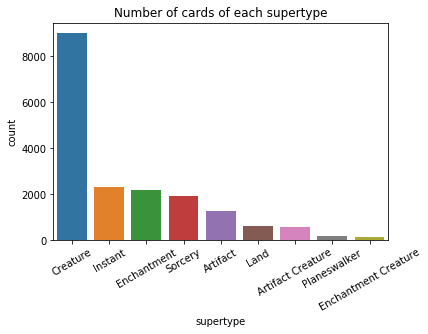

In [14]:
top_supertypes = data.groupby(["supertypes"], as_index = False).count().nlargest(9, "id")
sns.barplot(x = "supertypes", y="id", data = top_supertypes)
plt.title("Number of cards of each supertype")
plt.ylabel("count")
plt.xlabel("supertype")
plt.xticks(rotation = 30)
plt.show()

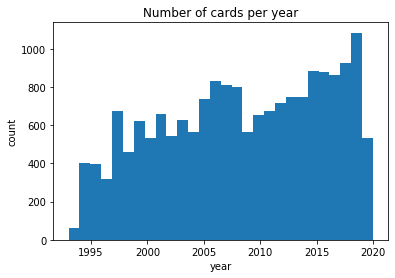

In [83]:
plt.hist(data["MAX(set_year)"], bins = "fd")
plt.title("Number of cards per year")
plt.xlabel("year")
plt.ylabel("count")
plt.show()

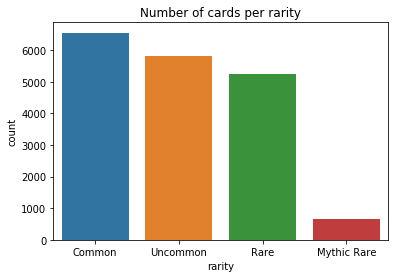

In [17]:
sns.countplot(x = "rarity", data = data, order = data["rarity"].value_counts().index)
plt.title("Number of cards per rarity")
plt.show()

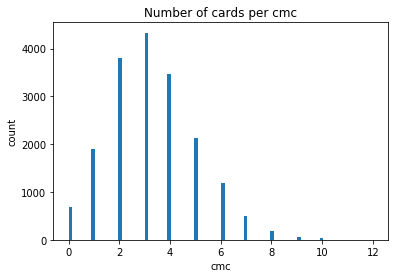

In [84]:
plt.hist(data["cmc"], bins = "fd")
plt.title("Number of cards per cmc")
plt.xlabel("cmc")
plt.ylabel("count")
plt.show()

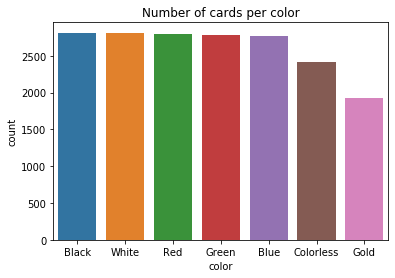

In [23]:
sns.countplot(x = "color", data = data, order = data["color"].value_counts().index)
plt.title("Number of cards per color")
plt.show()

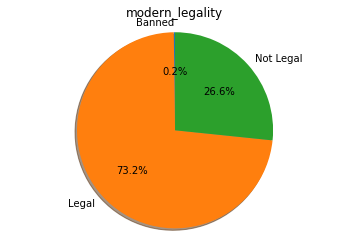

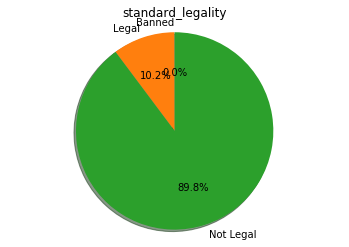

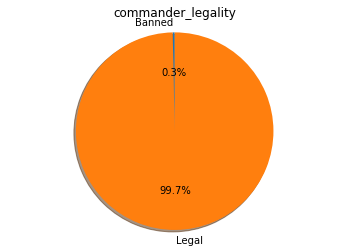

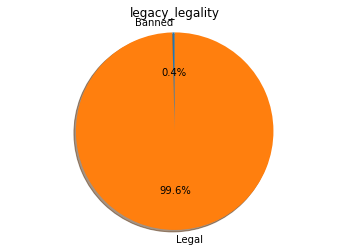

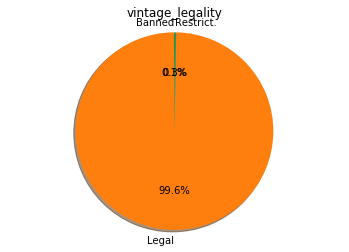

In [45]:
sizes = data.groupby(["modern_legality"], as_index = False).count()["id"].values
labels = "Banned", "Legal", "Not Legal"
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("modern_legality")
plt.show()

sizes = data.groupby(["standard_legality"], as_index = False).count()["id"].values
labels = "Banned", "Legal", "Not Legal"
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("standard_legality")
plt.show()

sizes = data.groupby(["commander_legality"], as_index = False).count()["id"].values
labels = "Banned", "Legal"
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("commander_legality")
plt.show()

sizes = data.groupby(["legacy_legality"], as_index = False).count()["id"].values
labels = "Banned", "Legal"
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("legacy_legality")
plt.show()

sizes = data.groupby(["vintage_legality"], as_index = False).count()["id"].values
labels = "Banned", "Legal", "Restrict."
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("vintage_legality")
plt.show()

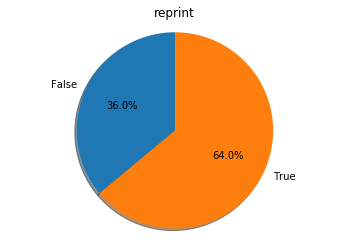

In [51]:
sizes = data.groupby(["reprint"], as_index = False).count()["id"].values
labels = "False", "True"
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("reprint")
plt.show()

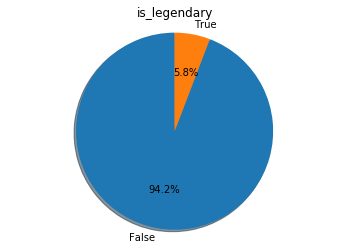

In [49]:
sizes = data.groupby(["is_legendary"], as_index = False).count()["id"].values
labels = "False", "True"
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("is_legendary")
plt.show()

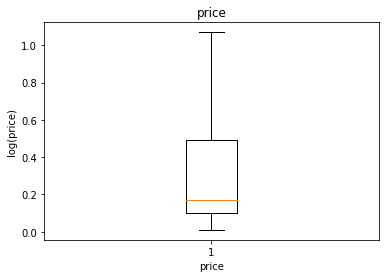

In [120]:
plt.boxplot(data["price"], showfliers = False)
plt.title("price")
plt.xlabel("price")
plt.ylabel("log(price)")
plt.show()

# plt.hist(data["price"], bins = "fd")
# plt.title("price")
# plt.xlabel("price")
# plt.ylabel("price")
# plt.show()

C:\Users\nsuse\Anaconda3\envs\env_full\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


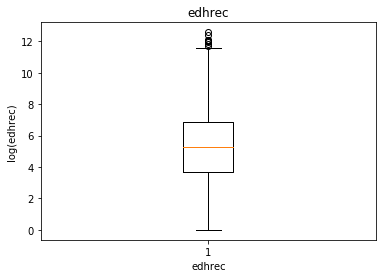

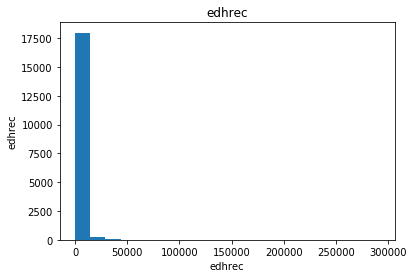

In [70]:
plt.boxplot(np.log(data["edhrec"]))
plt.title("edhrec")
plt.xlabel("edhrec")
plt.ylabel("log(edhrec)")
plt.show()

plt.hist(data["edhrec"], bins = 20)
plt.title("edhrec")
plt.xlabel("edhrec")
plt.ylabel("edhrec")
plt.show()

## multivariate summaries

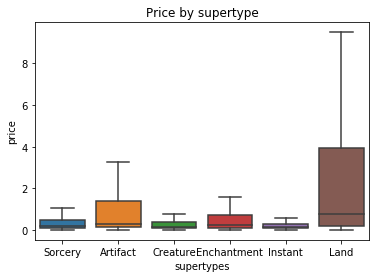

In [102]:
top_supertypes = data.groupby(["supertypes"], as_index = False).count().nlargest(6, "id")["supertypes"]
only_top_supertypes = data[data["supertypes"].isin(top_supertypes)]
sns.boxplot("supertypes", "price", data = only_top_supertypes, showfliers = False)
plt.title("Price by supertype")
plt.show()


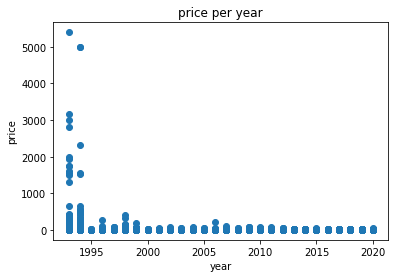

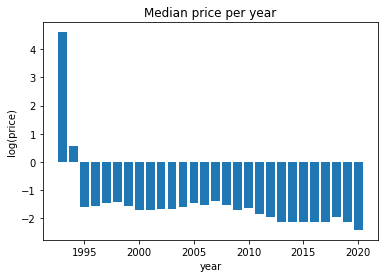

In [115]:
plt.scatter(data["MAX(set_year)"], data["price"])
plt.title("price per year")
plt.xlabel("year")
plt.ylabel("price")
plt.show()

plt.bar(data.groupby(["MAX(set_year)"], as_index = False).median()["MAX(set_year)"], np.log(data.groupby(["MAX(set_year)"], as_index = False).median()["price"]))
plt.title("Median price per year")
plt.xlabel("year")
plt.ylabel("log(price)")
plt.show()

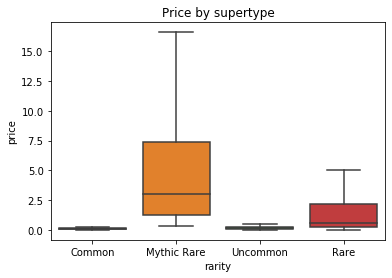

In [116]:
sns.boxplot("rarity", "price", data = data, showfliers = False)
plt.title("Price by rarity")
plt.show()

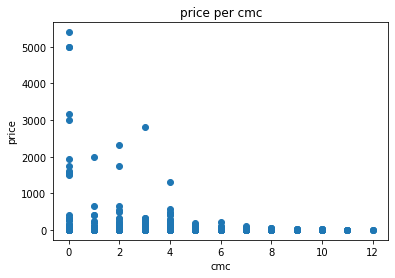

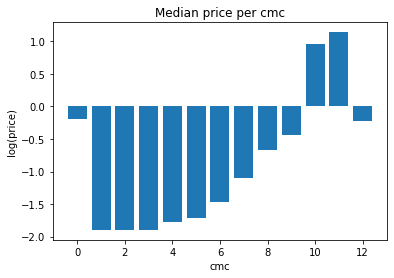

In [118]:
plt.scatter(data["cmc"], data["price"])
plt.title("price per cmc")
plt.xlabel("cmc")
plt.ylabel("price")
plt.show()

plt.bar(data.groupby(["cmc"], as_index = False).median()["cmc"], np.log(data.groupby(["cmc"], as_index = False).median()["price"]))
plt.title("Median price per cmc")
plt.xlabel("cmc")
plt.ylabel("log(price)")
plt.show()

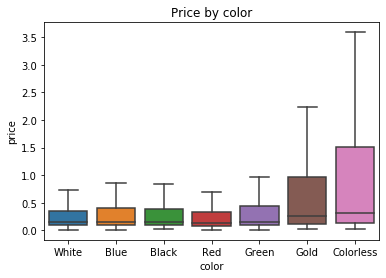

In [119]:
sns.boxplot("color", "price", data = data, showfliers = False)
plt.title("Price by color")
plt.show()

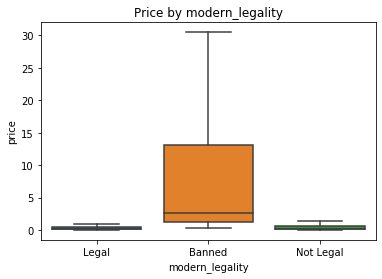

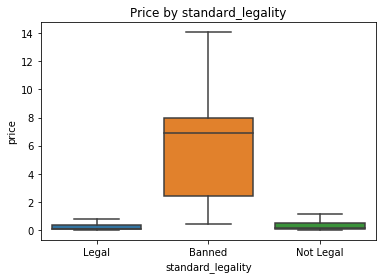

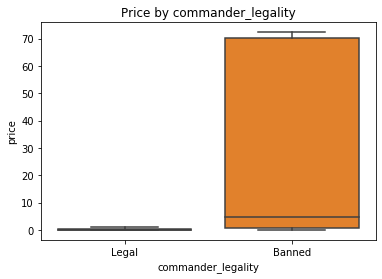

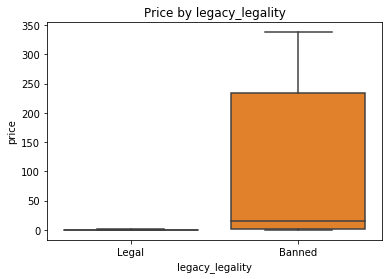

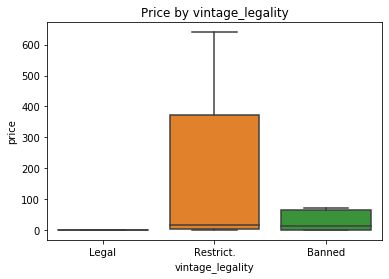

In [124]:
sns.boxplot("modern_legality", "price", data = data, showfliers = False)
plt.title("Price by modern_legality")
plt.show()

sns.boxplot("standard_legality", "price", data = data, showfliers = False)
plt.title("Price by standard_legality")
plt.show()

sns.boxplot("commander_legality", "price", data = data, showfliers = False)
plt.title("Price by commander_legality")
plt.show()

sns.boxplot("legacy_legality", "price", data = data, showfliers = False)
plt.title("Price by legacy_legality")
plt.show()

sns.boxplot("vintage_legality", "price", data = data, showfliers = False)
plt.title("Price by vintage_legality")
plt.show()

## feature selection